In [2]:
# 2. DATASET과 DATALOADER

# 2-1. 데이터셋 불러오기 (FashionMNIST, 28x28 이미지와 10개의 class 중 하나인 정답(label) 구성)
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",          #학습/테스트 데이터가 저장되는 경로
    train=True,           #학습용 또는 테스트용 데이터셋 여부 지정
    download=True,        #root에 데이터가 없는 경우 인터넷에서 다운로드
    transform=ToTensor()  #특징(feature)과 정답(label) 변형(transform) 지정
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


100.6%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


85.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


119.3%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


25156
10144
42720
38641
54822
54422
3328
1218
7809


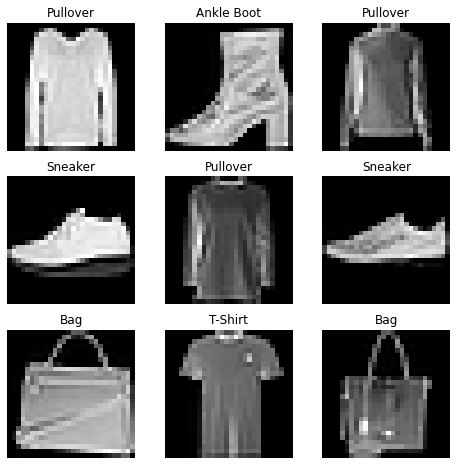

In [5]:
# 2-2. 데이터셋을 반복하고 시각화하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    """print(sample_idx)"""
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# 2-3. 파일에서 사용자 정의 데이터셋 만들기
#__init__, __len__, __getitem__ 세가지 함수 구현해야 함.
#FashionMNIST 이미지들은 img_dir 디렉토리에 저장됨, 정답(label)은 annotation_file csv 파일에 저장됨 (ex: tshirt1.jpg, 0 / ,,,)
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    #이미지와 annotation_file이 포함된 디렉토리와 두가지 변형(transform)을 초기화함
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):  
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    #데이터셋의 샘플 개수 반환
    def __len__(self):
        return len(self.img_labels)
    
    #주어진 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환
    def __getitem__(self, idx):
        img_path - os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)          #이미지를 텐서로 변환
        label - self.img_labels.iloc[idx, 1]  #csv의 데이터로부터 정답(label)가져옴
        if self.transform:                    #정답 해당하는 경우 변형(transform) 후 텐서이미지와 라벨을 dictionary형으로 반환
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

ModuleNotFoundError: No module named 'pandas'